# Teorema del aproximador universal
[CHAPTER 4. A visual proof that neural nets can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html)

Dada una función continua cualquiera $f(\vec{x})$, existe una red neuronal de tres capas tal que para cada entrada $x$ la salida es $\hat{f}(\vec{x})$ con $|\hat{f}(\vec{x}) - f(x)| < \varepsilon$.


## Comprendiendo la función de activación

Consideremos el funcionamiuento de un solo perceptron:

<center><img src="./figuras/Perceptron.png"></center>

con las funciones:

\begin{align}
\sigma(z) &= \frac{1}{1 + e^{-z}} \\
   z &= wx+b
\end{align}

Juega con los parametros $w$ y $b$ para ver su efecto en la funcion de salida.

In [11]:
using GLMakie
using LaTeXStrings

In [12]:
function plot_perceptron_function(w, b)
    fig = Figure()
    axez = [
        Axis(fig[1, 1], xlabel = "x", ylabel = "z"),
        Axis(fig[1, 2], xlabel = "x", ylabel = "z"),
    ]

    x = -2:0.1:2
    z = w * x + b
    σ_z = 1 / (1 + exp.(-z))

    lines!(axez[1], x, z, color = :blue, linewidth = 2)
    lines!(axez[2], x, σ_z, color = :red, linewidth = 2)

    fig
end

plot_perceptron_function(8, 3)

LoadError: MethodError: no method matching +(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  +([91m::Polynomials.SparsePolynomial{T, X}[39m, ::S) where {T, X, S<:Number}
[0m[90m   @[39m [32mPolynomials[39m [90mC:\Users\csmis\.julia\packages\Polynomials\UpyN2\src\polynomials\[39m[90m[4mSparsePolynomial.jl:166[24m[39m
[0m  +([91m::P[39m, ::S) where {T, X, P<:Polynomials.Polynomial{T, X}, S<:Number}
[0m[90m   @[39m [32mPolynomials[39m [90mC:\Users\csmis\.julia\packages\Polynomials\UpyN2\src\polynomials\[39m[90m[4mPolynomial.jl:57[24m[39m
[0m  ...


w = 200, b = -20.0
sigma_z = [3.9474587518512645e-183, 1.9151695967140057e-174, 9.291736316326398e-166, 4.508027065606742e-157, 2.1871378321977182e-148, 1.0611231537463512e-139, 5.148200222412014e-131, 2.4977275669152505e-122, 1.2118104830828576e-113, 5.8792826982452694e-105, 2.852423339163565e-96, 1.3838965267367376e-87, 6.714184288211594e-79, 3.257488532207521e-70, 1.580420060273613e-61, 7.667648073722e-53, 3.7200759760208356e-44, 1.8048513878454153e-35, 8.75651076269652e-27, 4.248354255291589e-18, 2.0611536181902037e-9, 0.5, 0.9999999979388463, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


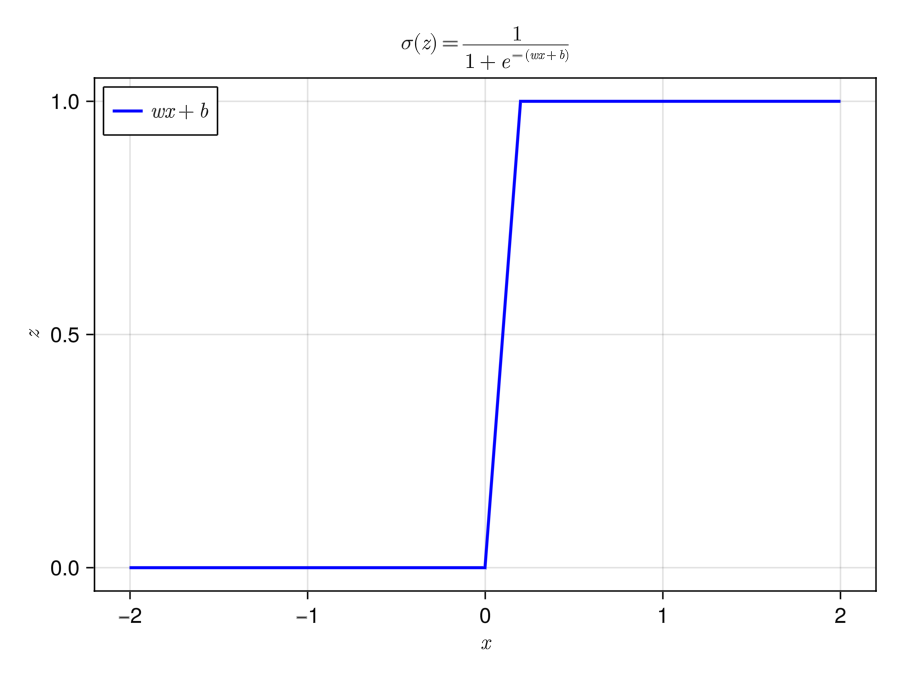

In [20]:
function plot_perceptron_function(s)
    w = 200
    b = - s * w

    x = -2:0.1:2
    z = w * x .+ b
    σ_z = 1 ./ (1 .+ exp.(-z))

    println("w = $w, b = $b")
    println("sigma_z = $σ_z")

    fig = Figure()
    ax = Axis(
        fig[1, 1],
        xlabel = L"x",
        ylabel = L"z",
        title = L"\sigma (z) = \frac{1}{1 + e^{-(wx + b)}}",
    )

    lines!(ax, x, σ_z, color = :blue, linewidth = 2, label = L"wx + b")
    axislegend(ax, position = :lt)

    fig
end

plot_perceptron_function(0.1)

# Interación entre perceptrones

Utilizamos ahora dos perceptrones aproximando un esclón para generar los bloques constructores de esta muestra.

<center><img src="./figuras/Red2.png"></center>


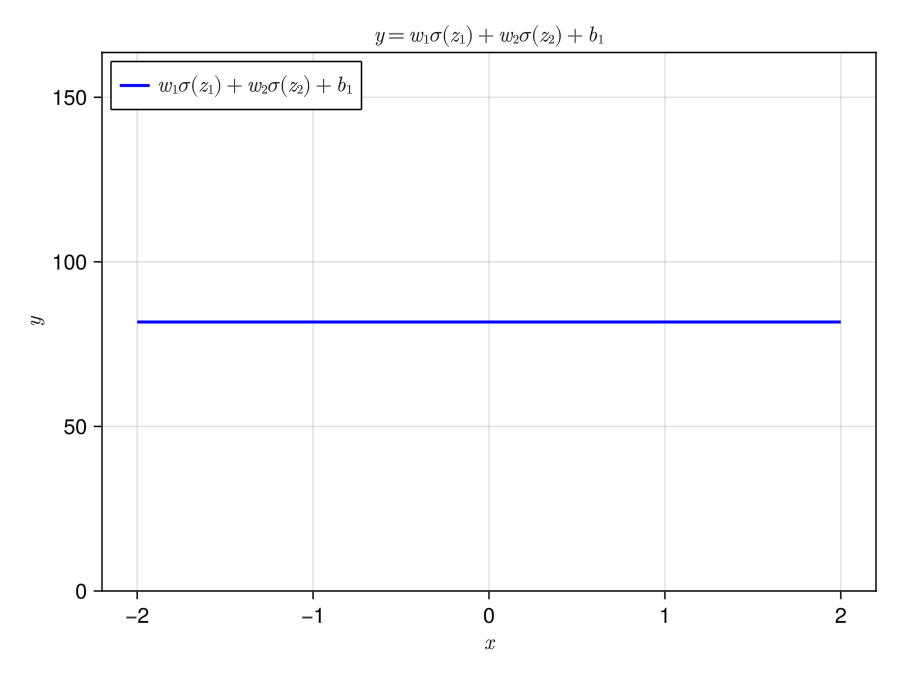

In [21]:
function plot_two_perceptrons(s1, s2, w1, w2)
    w = -200
    b1_1 = - s1 * w
    b1_2 = - s2 * w

    x = -2:0.1:2
    z1 = w1 * x .+ b1_1
    z2 = w2 * x .+ b1_2
    σ_z1 = 1 ./ (1 .+ exp.(-z1))
    σ_z2 = 1 ./ (1 .+ exp.(-z2))

    y = w1 * σ_z1 .+ w2 * σ_z2 .+ b1_1

    fig = Figure()
    ax = Axis(
        fig[1, 1],
        xlabel = L"x",
        ylabel = L"y",
        title = L"y = w_1 \sigma (z_1) + w_2 \sigma (z_2) + b_1",
    )

    lines!(ax, x, y, color = :blue, linewidth = 2, label = L"w_1 \sigma (z_1) + w_2 \sigma (z_2) + b_1")
    axislegend(ax, position = :lt)

    fig
end

plot_two_perceptrons(0.4, 0.6, 0.6, 1.2)

# Aproximación 

Propongamos como ejemplo la función de una dimensión:

\begin{align}
  f(x) = \frac{x}{2} \left(\text{sen}(20x) - \text{cos}\left(\frac{20}{3}x\right)\right)
\end{align}


In [22]:
f(x) = x / 2 + (sin(20 * x) + cos(20 * x / 3))

f (generic function with 1 method)

In [26]:
function plot_approx(h1, h2, h3, h4, h5, h6)
    hs = [h1, h2, h3, h4, h5, h6]
    num_bars = length(hs)
    x = 0:0.02:1
    y = f.(x)

    fig = Figure()
    ax = Axis(
        fig[1, 1],
        xlabel = L"x",
        ylabel = L"y",
        title = L"\hat{y} = \sum_{i=1}^{6} h_i(x) \sigma (z_i) + b_1",
    )

    barplot!(ax, x, hs, y, color = :blue, label = L"\hat{y}", alpha = 0.5)

    fig
end

plot_approx(0.01, -0.1, 0.38, -0.04, 0.34, -0.82)

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 6 and 51